In [1]:
#Multifactor house price predict
#load data
import pandas as pd
import numpy as np
data = pd.read_csv('usa_housing_price.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size,Price
0,79545.45857,5.317139,7.009188,23086.80050,188.214212,1.059034e+06
1,79248.64245,4.997100,6.730821,40173.07217,160.042526,1.505891e+06
2,61287.06718,5.134110,8.512727,36882.15940,227.273545,1.058988e+06
3,63345.24005,3.811764,5.586729,34310.24283,164.816630,1.260617e+06
4,59982.19723,5.959445,7.839388,26354.10947,161.966659,6.309435e+05


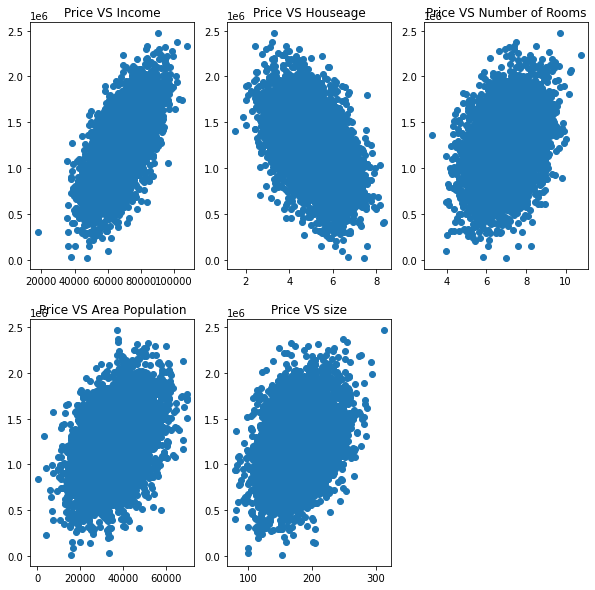

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,10))
fig1 = plt.subplot(231)
plt.scatter(data.loc[:,'Avg. Area Income'],data.loc[:,'Price'])
plt.title('Price VS Income')

fig2 = plt.subplot(232)
plt.scatter(data.loc[:,'Avg. Area House Age'],data.loc[:,'Price'])
plt.title('Price VS Houseage')

fig3 = plt.subplot(233)
plt.scatter(data.loc[:,'Avg. Area Number of Rooms'],data.loc[:,'Price'])
plt.title('Price VS Number of Rooms')

fig4 = plt.subplot(234)
plt.scatter(data.loc[:,'Area Population'],data.loc[:,'Price'])
plt.title('Price VS Area Population')

fig5 = plt.subplot(235)
plt.scatter(data.loc[:,'size'],data.loc[:,'Price'])
plt.title('Price VS size')

plt.show()

[[3674.54995744]] [585279.33130382]
108771672553.6264 0.1275031240418234


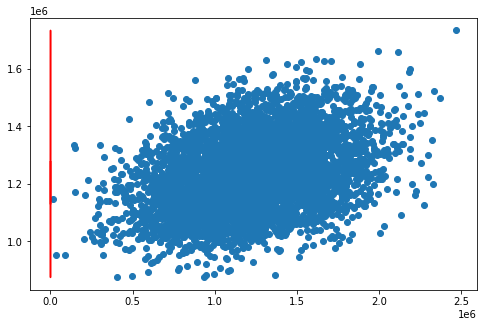

In [22]:
#single factor size
#define x and y
x = data.loc[:,'size']
y = data.loc[:,'Price']
x.head()
#set linear regression model
from sklearn.linear_model import LinearRegression
lr_model1 = LinearRegression()
#Train the model
x = np.array(x)
x = x.reshape(-1,1)
y = np.array(y)
y = y.reshape(-1,1)
lr_model1.fit(x,y)
#evalute
y_predict1 = lr_model1.predict(x)
#print a,b
a = lr_model1.coef_
b = lr_model1.intercept_
print(a,b)
#evaluate the model
from sklearn.metrics import mean_squared_error,r2_score
MSE1 = mean_squared_error(y,y_predict1)
R21 = r2_score(y,y_predict1)
print(MSE1,R21)
#visualizion
fig6 = plt.figure(figsize=(8,5))
plt.scatter(y,y_predict1)
plt.plot(x,y_predict1,'r')
plt.show()

[[1223968.89166086]
 [1497306.3318863 ]
 [1250884.31019437]
 ...
 [1020693.92390376]
 [1260503.36914585]
 [1302737.7915763 ]]
10219846512.17786 0.9180229195220739


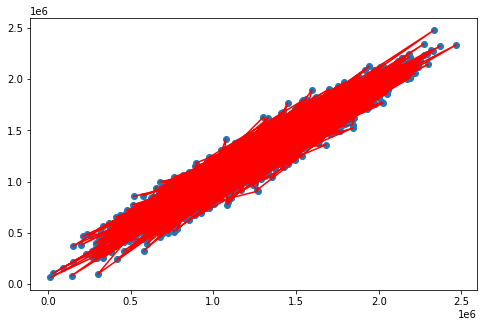

In [19]:
#input muti-factor
#define x muti and y
x_multi = data.drop(['Price'],axis=1)
#set linear regression model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
#train
lr_model.fit(x_multi,y)
#preict
y_predict = lr_model.predict(x_multi)
print(y_predict)
#evaluate the model
from sklearn.metrics import mean_squared_error,r2_score
MSE = mean_squared_error(y,y_predict)
R2 = r2_score(y,y_predict)
print(MSE,R2)
#visualizion
fig7 = plt.figure(figsize=(8,5))
plt.scatter(y,y_predict)
plt.plot(y,y_predict,'r')
plt.show()

In [23]:
x_test = [65000,5,5,30000,200]
x_test = np.array(x_test).reshape(1,-1)
y_test_predict = lr_model.predict(x_test)
print(y_test_predict)

[[817052.19516298]]
